# Trust as a Mediator: Data Exploration

- Project: Urban-Rural Residence, Social Trust, and Poltical Tolerance
- Author: Nicole Lucas
- Date: December 2025 
- Description: Initial exploration of General Social Survey (GSS) data 



### Table of Contents 
1. Setup and Configuration
2. Data Loading
3. Initial Data Inspection
4. Variable Exploration
   4.1 Dependent Variable: Political Tolerance
   4.2 Mediator: Social Trust
   4.3 Independent Variable: Urbanicity
   4.4 Control Variables
5. Missing Data Analysis
6. Data Quality Checks
7. Key Takeaways and Next Steps

## Setup and Configuration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("colorblind")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

np.random.seed(42)

print("✓ Libraries loaded successfully")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

✓ Libraries loaded successfully
Pandas version: 1.5.3
NumPy version: 1.23.5


## Data Loading

In [3]:
data_path = "raw_data_gss/gss_raw_data_poltol.csv"

try:
    df_raw = pd.read_csv(data_path, low_memory=False)
    print(f"✓ Data loaded successfully")
    print(f"  - Shape: {df_raw.shape}")
    print(f"  - Memory usage: {df_raw.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
except FileNotFoundError:
    print("✗ Error: Data file not found. Please check the path.")
    print(f"  Expected location: {data_path}")

✓ Data loaded successfully
  - Shape: (37583, 36)
  - Memory usage: 85.90 MB


**Data Source Information:**
- **Source:** General Social Survey (GSS), NORC at the University of Chicago
- **Download Date:** November 2025
- **Years Included:** 2000-2024
- **Access:** https://gssdataexplorer.norc.org/
- **Citation:** Smith, Tom W., Michael Davern, Jeremy Freese, and Stephen Morgan. 
  General Social Surveys, 1972-2022. Chicago: NORC, 2023.

## Initial Data Inspection

In [4]:
print("="*80)
print("DATASET OVERVIEW")
print("="*80)
print(f"\nDimensions: {df_raw.shape[0]:,} rows × {df_raw.shape[1]} columns")
print(f"Time period: {df_raw['year'].min()} - {df_raw['year'].max()}")
print(f"\nColumn types:")
print(df_raw.dtypes.value_counts())

DATASET OVERVIEW

Dimensions: 37,583 rows × 36 columns
Time period: 2000 - 2024

Column types:
object     33
int64       2
float64     1
dtype: int64


#### First Look at the Data

In [6]:
print("\n" + "="*80)
print("FIRST 5 ROWS")
print("="*80)
df_raw.head()


FIRST 5 ROWS


,year,id_,age,educ,degree,sex,race,income,rincome,region,xnorcsiz,partyid,polviews,spkath,colath,libath,spkrac,colrac,librac,spkcom,colcom,libcom,colmil,libmil,spkhomo,colhomo,libhomo,spkmslm,colmslm,libmslm,helpful,fair,trust,hispanic,ballot,wtss
0,2000,1,26,4 years of college,Bachelor's,MALE,White,.n: No answer,$8000 TO 9999,South,A suburb of a large central city,"Independent, close to republican",Slightly conservative,ALLOWED,ALLOWED,NOT REMOVE,ALLOWED,ALLOWED,NOT REMOVE,ALLOWED,Not fired,NOT REMOVE,ALLOWED,NOT REMOVE,ALLOWED,ALLOWED,NOT REMOVE,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,Not Hispanic,Ballot a,-70.00
1,2000,2,48,3 years of college,High school,FEMALE,White,"$8,000 to $9,999",$8000 TO 9999,South,A suburb of a large central city,Not very strong republican,Conservative,NOT ALLOWED,NOT ALLOWED,NOT REMOVE,NOT ALLOWED,ALLOWED,NOT REMOVE,NOT ALLOWED,"Yes, fired",NOT REMOVE,.d: Do not Know/Cannot Choose,REMOVE,ALLOWED,ALLOWED,NOT REMOVE,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,Looking out for themselves,Would try to be fair,Can't be too careful,Puerto Rican,Ballot c,-70.00
2,2000,3,67,1 year of college,High school,FEMALE,White,"$15,000 to $19,999",.i: Inapplicable,South,A suburb of a large central city,"Independent (neither, no response)",Conservative,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,Depends,Depends,Can't be too careful,Not Hispanic,Ballot b,-70.00
3,2000,4,39,2 years of college,High school,FEMALE,White,"$25,000 or more",.i: Inapplicable,South,A suburb of a large central city,"Independent, close to republican",Slightly conservative,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,Try to be helpful,Would try to be fair,Most people can be trusted,Not Hispanic,Ballot b,-70.00
4,2000,5,25,2 years of college,Associate/junior college,FEMALE,White,"$25,000 or more",.i: Inapplicable,South,A suburb of a large central city,Not very strong democrat,Slightly liberal,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,Try to be helpful,Depends,Can't be too careful,Not Hispanic,Ballot b,-70.00


In [7]:
print("\n" + "="*80)
print("LAST 5 ROWS")
print("="*80)
df_raw.tail()


LAST 5 ROWS


,year,id_,age,educ,degree,sex,race,income,rincome,region,xnorcsiz,partyid,polviews,spkath,colath,libath,spkrac,colrac,librac,spkcom,colcom,libcom,colmil,libmil,spkhomo,colhomo,libhomo,spkmslm,colmslm,libmslm,helpful,fair,trust,hispanic,ballot,wtss
37578,2024,3305,84,8 or more years of college,Graduate,MALE,White,"$4,000 to $4,999",$4000 TO 4999,Northeast,A suburb of a medium size central city,Not very strong democrat,Slightly liberal,ALLOWED,ALLOWED,NOT REMOVE,NOT ALLOWED,NOT ALLOWED,NOT REMOVE,ALLOWED,Not fired,NOT REMOVE,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,"Yes, allowed","Yes, allowed",Not remove,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,Not Hispanic,Ballot c,-70.00
37579,2024,3306,68,2 years of college,High school,MALE,White,"$25,000 or more",$25000 OR MORE,Northeast,A suburb of a medium size central city,"Independent, close to democrat",Slightly conservative,.i: Inapplicable,NOT ALLOWED,.i: Inapplicable,.i: Inapplicable,NOT ALLOWED,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.i: Inapplicable,Not allowed,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,Not Hispanic,Ballot a,-70.00
37580,2024,3307,74,12th grade,High school,FEMALE,White,"$25,000 or more",$10000 - 14999,Northeast,A suburb of a medium size central city,"Independent (neither, no response)",Conservative,ALLOWED,NOT ALLOWED,NOT REMOVE,NOT ALLOWED,NOT ALLOWED,REMOVE,ALLOWED,Not fired,NOT REMOVE,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,"Yes, allowed","Yes, allowed",Not remove,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,Not Hispanic,Ballot a,-70.00
37581,2024,3308,51,8 or more years of college,Graduate,FEMALE,White,"$25,000 or more",$25000 OR MORE,Northeast,A suburb of a medium size central city,"Independent, close to democrat",Extremely liberal,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,Not Hispanic,Ballot b,-70.00
37582,2024,3309,69,6 years of college,Graduate,FEMALE,White,"$25,000 or more",$25000 OR MORE,Northeast,A suburb of a medium size central city,Not very strong democrat,Slightly liberal,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,Try to be helpful,Depends,Most people can be trusted,Not Hispanic,Ballot b,-70.00


#### Data Structure

In [8]:
print("\n" + "="*80)
print("DATA STRUCTURE")
print("="*80)
df_raw.info()


DATA STRUCTURE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37583 entries, 0 to 37582
Data columns (total 36 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      37583 non-null  int64  
 1   id_       37583 non-null  int64  
 2   age       37583 non-null  object 
 3   educ      37583 non-null  object 
 4   degree    37583 non-null  object 
 5   sex       37583 non-null  object 
 6   race      37583 non-null  object 
 7   income    37583 non-null  object 
 8   rincome   37583 non-null  object 
 9   region    37583 non-null  object 
 10  xnorcsiz  37583 non-null  object 
 11  partyid   37583 non-null  object 
 12  polviews  37583 non-null  object 
 13  spkath    37583 non-null  object 
 14  colath    37583 non-null  object 
 15  libath    37583 non-null  object 
 16  spkrac    37583 non-null  object 
 17  colrac    37583 non-null  object 
 18  librac    37583 non-null  object 
 19  spkcom    37583 non-null  object 
 20  colcom    37

#### Sample Size by Year


SAMPLE SIZE BY YEAR
2000    2817
2002    2765
2004    2812
2006    4510
2008    2023
2010    2044
2012    1974
2014    2538
2016    2867
2018    2348
2021    4032
2022    3544
2024    3309
Name: year, dtype: int64

Total observations: 37,583


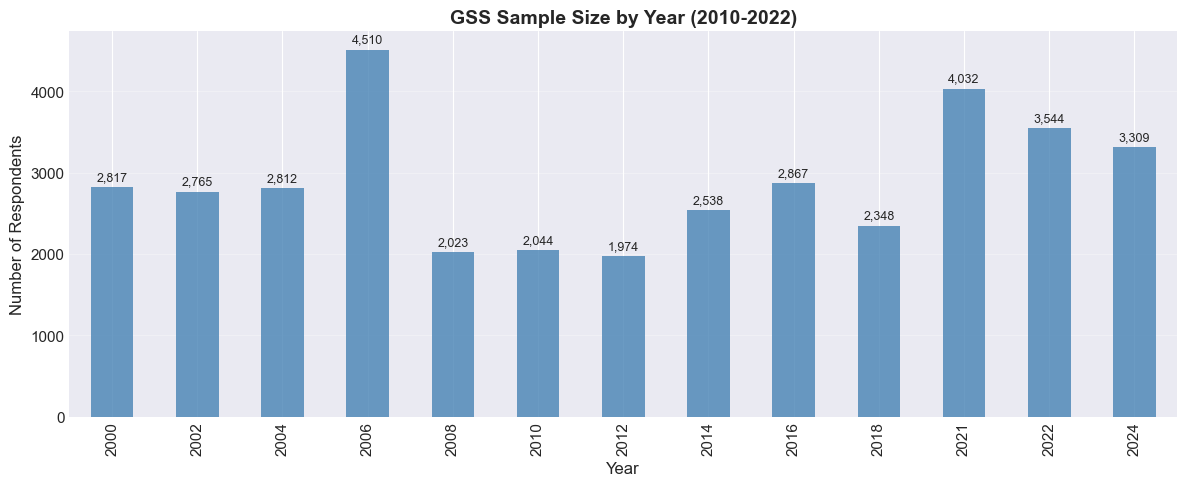

In [10]:
year_counts = df_raw['year'].value_counts().sort_index()

print("\n" + "="*80)
print("SAMPLE SIZE BY YEAR")
print("="*80)
print(year_counts)
print(f"\nTotal observations: {year_counts.sum():,}")

fig, ax = plt.subplots(figsize=(12, 5))
year_counts.plot(kind='bar', ax=ax, color='steelblue', alpha=0.8)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Number of Respondents', fontsize=12)
ax.set_title('GSS Sample Size by Year (2010-2022)', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

for i, v in enumerate(year_counts):
    ax.text(i, v + 50, f'{v:,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

**Observation:**
- 2006, there was a high recording while 2012 had a particularly low amount of respondents
- Minimum sample: 1,974
- Maximum sample: 4,510

## Variable Exploration

In this section, we examine each key variable for our analysis:
1. **Dependent Variable:** Political tolerance
2. **Mediator:** Social trust
3. **Independent Variable:** Urbanicity
4. **Controls:** Demographics and political characteristics

#### Dependent Variable: Political Tolerance

In [11]:
print("="*80)
print("POLITICAL TOLERANCE VARIABLES")
print("="*80)

tolerance_vars = [col for col in df_raw.columns if any(x in col.lower() 
                  for x in ['spk', 'lib', 'col'])]

print(f"Found {len(tolerance_vars)} tolerance-related variables:")
print(tolerance_vars)

POLITICAL TOLERANCE VARIABLES
Found 17 tolerance-related variables:
['spkath', 'colath', 'libath', 'spkrac', 'colrac', 'librac', 'spkcom', 'colcom', 'libcom', 'colmil', 'libmil', 'spkhomo', 'colhomo', 'libhomo', 'spkmslm', 'colmslm', 'libmslm']


In [12]:
sample_tolerance = ['spkath', 'libath', 'colath',  # Atheist
                    'spkrac', 'librac', 'colrac',  # Racist  
                    'spkcom', 'libcom', 'colcom']  # Communist

print("\n" + "="*80)
print("TOLERANCE VARIABLE DETAILS")
print("="*80)

for var in sample_tolerance:
    if var in df_raw.columns:
        print(f"\n{var.upper()}:")
        print(df_raw[var].value_counts(dropna=False).sort_index())
        print(f"Missing: {df_raw[var].isna().sum()} ({df_raw[var].isna().sum()/len(df_raw)*100:.1f}%)")


TOLERANCE VARIABLE DETAILS

SPKATH:
.d:  Do not Know/Cannot Choose      141
.i:  Inapplicable                 19150
.n:  No answer                       34
.s:  Skipped on Web                  14
ALLOWED                           14288
NOT ALLOWED                        3956
Name: spkath, dtype: int64
Missing: 0 (0.0%)

LIBATH:
.d:  Do not Know/Cannot Choose      338
.i:  Inapplicable                 19150
.n:  No answer                       35
.s:  Skipped on Web                  16
NOT REMOVE                        13789
REMOVE                             4255
Name: libath, dtype: int64
Missing: 0 (0.0%)

COLATH:
.d:  Do not Know/Cannot Choose      514
.i:  Inapplicable                 15520
.n:  No answer                       54
.s:  Skipped on Web                  33
ALLOWED                           13906
NOT ALLOWED                        7556
Name: colath, dtype: int64
Missing: 0 (0.0%)

SPKRAC:
.d:  Do not Know/Cannot Choose      227
.i:  Inapplicable                 19150
.

**Tolerance Variable Coding:**
- ALLOWED = Allowed (tolerant response)
- NOT ALLOWED = Not allowed (intolerant response)
- Missing codes: Various (to be handled in cleaning)

**Target Groups:**
- Atheists (spkath, libath, colath)
- Racists (spkrac, librac, colrac)
- Communists (spkcom, libcom, colcom)
- Militarists (spkmil, libmil, colmil)
- Homosexuals (spkhomo, libhomo, colhomo)
- Muslims (spkmslm, libmslm, colmslm)

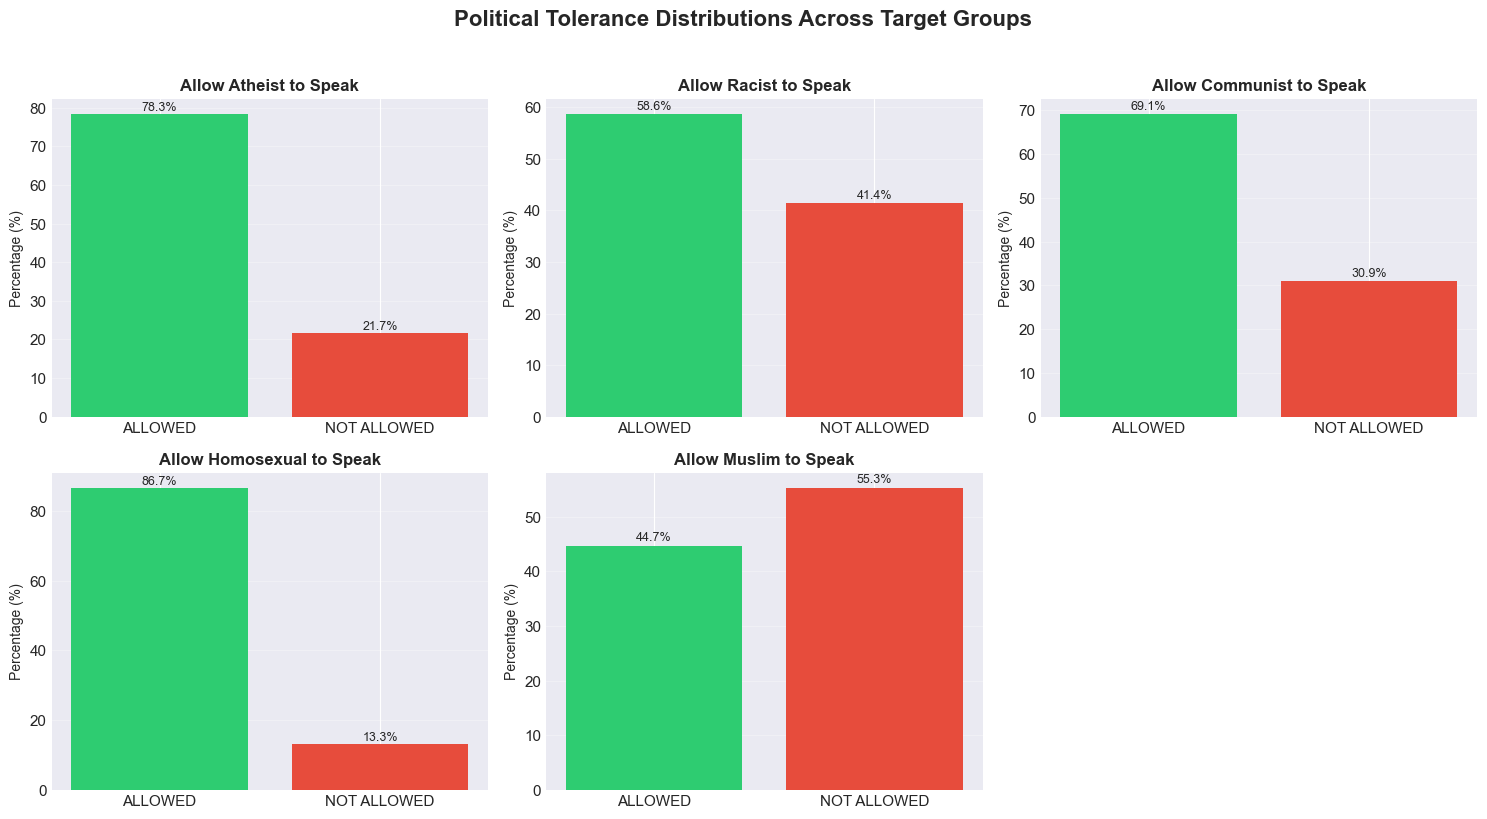

In [20]:
# Visualize tolerance patterns
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Political Tolerance Distributions Across Target Groups', 
             fontsize=16, fontweight='bold', y=1.02)

sample_vars = ['spkath', 'spkrac', 'spkcom', 'spkhomo', 'spkmslm']
target_labels = ['Atheist', 'Racist', 'Communist', 'Homosexual', 'Muslim']

# Define valid response values for each variable type
allowed_values = ['ALLOWED', 'Yes, allowed']
not_allowed_values = ['NOT ALLOWED', 'Not allowed']

for idx, (var, label) in enumerate(zip(sample_vars, target_labels)):
    ax = axes[idx // 3, idx % 3]
    
    if var in df_raw.columns:
        # Filter for valid responses only (exclude missing data codes starting with '.')
        valid_data = df_raw[var][~df_raw[var].astype(str).str.startswith('.')]
        
        if len(valid_data) > 0:
            # Standardize the labels for counting
            standardized = valid_data.replace({
                'ALLOWED': 'ALLOWED',
                'Yes, allowed': 'ALLOWED',
                'NOT ALLOWED': 'NOT ALLOWED',
                'Not allowed': 'NOT ALLOWED'
            })
            
            # Count occurrences
            counts = standardized.value_counts(normalize=True) * 100
            
            # Ensure consistent ordering: ALLOWED first, NOT ALLOWED second
            allowed_pct = counts.get('ALLOWED', 0)
            not_allowed_pct = counts.get('NOT ALLOWED', 0)
            
            # Plot in specific order
            bars = ax.bar([0, 1], [allowed_pct, not_allowed_pct], 
                         color=['#2ecc71', '#e74c3c'])
            
            ax.set_title(f'Allow {label} to Speak', fontsize=12, fontweight='bold')
            ax.set_xlabel('')
            ax.set_ylabel('Percentage (%)', fontsize=10)
            ax.set_xticks([0, 1])
            ax.set_xticklabels(['ALLOWED', 'NOT ALLOWED'], rotation=0)
            ax.grid(axis='y', alpha=0.3)
            
            # Add percentage labels
            ax.text(0, allowed_pct + 1, f'{allowed_pct:.1f}%', ha='center', fontsize=9)
            ax.text(1, not_allowed_pct + 1, f'{not_allowed_pct:.1f}%', ha='center', fontsize=9)
        else:
            ax.text(0.5, 0.5, 'No valid data', ha='center', va='center')
            ax.set_xticks([])
            ax.set_yticks([])
    else:
        ax.text(0.5, 0.5, f'{var} not found', ha='center', va='center')
        ax.set_xticks([])
        ax.set_yticks([])

# Hide the 6th subplot
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

**Key Observations:**
- Group that faces most tolerance: Homosexuals
- Group that faces least tolerance: Musim
- Note that missing and null variables are excluded. TO DO: Check years and correlate it to news.

#### Mediator: Social Trust

In [21]:
print("="*80)
print("SOCIAL TRUST VARIABLES")
print("="*80)

trust_vars = ['trust', 'helpful', 'fair']

for var in trust_vars:
    if var in df_raw.columns:
        print(f"\n{var.upper()}:")
        print(df_raw[var].value_counts(dropna=False).sort_index())
        print(f"Missing: {df_raw[var].isna().sum()} ({df_raw[var].isna().sum()/len(df_raw)*100:.1f}%)")
    else:
        print(f"\n{var.upper()}: NOT FOUND IN DATASET")

SOCIAL TRUST VARIABLES

TRUST:
.d:  Do not Know/Cannot Choose        45
.i:  Inapplicable                  15896
.n:  No answer                        19
.y:  Not available in this year     4032
Can't be too careful               10917
Depends                             1059
Most people can be trusted          5615
Name: trust, dtype: int64
Missing: 0 (0.0%)

HELPFUL:
.d:  Do not Know/Cannot Choose        75
.i:  Inapplicable                  16417
.n:  No answer                        13
.s:  Skipped on Web                    1
.y:  Not available in this year     4032
Depends                             1585
Looking out for themselves          7666
Try to be helpful                   7794
Name: helpful, dtype: int64
Missing: 0 (0.0%)

FAIR:
.d:  Do not Know/Cannot Choose       124
.i:  Inapplicable                  16417
.n:  No answer                        22
.y:  Not available in this year     4032
Depends                             1485
Would take advantage of you         6977
W

**Trust Variable Coding:**
- **TRUST:** "Generally speaking, would you say that most people can be trusted or that you can't be too careful?"
  - 1 = Can trust
  - 2 = Can't be too careful
  - 3 = Depends

- **HELPFUL:** "Would you say that most of the time people try to be helpful?"
  - 1 = Try to be helpful
  - 2 = Just look out for themselves
  - 3 = Depends

- **FAIR:** "Do you think most people would try to take advantage of you?"
  - 1 = Would take advantage
  - 2 = Would try to be fair
  - 3 = Depends

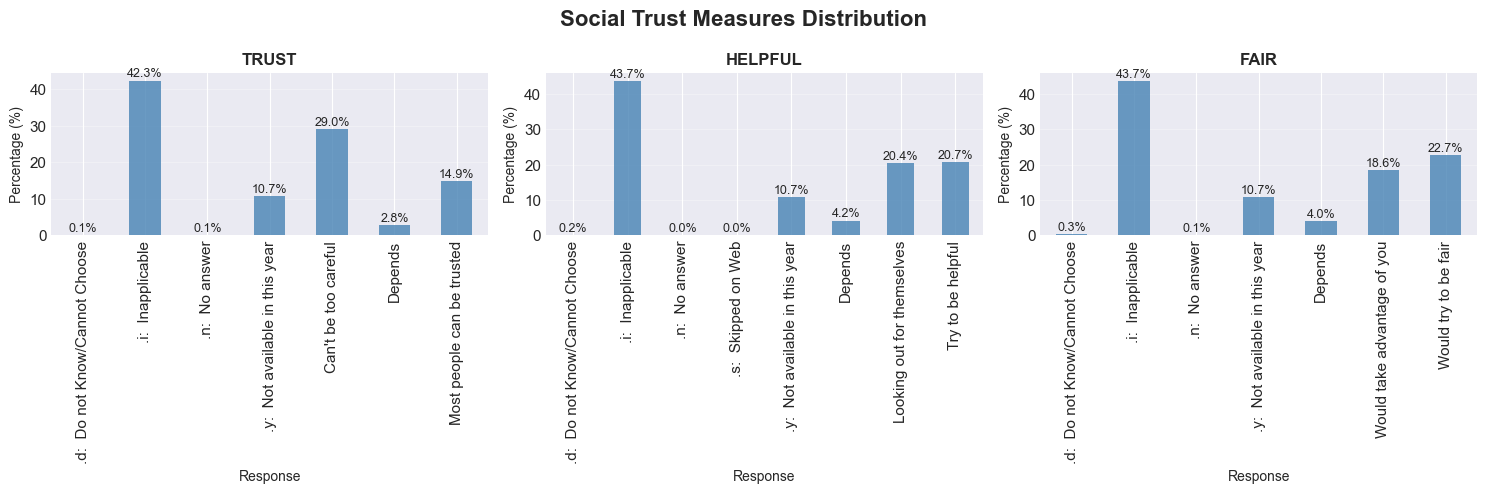

✓ Figure saved: reports/figures/trust_distributions.png


In [22]:
# Visualize trust distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Social Trust Measures Distribution', fontsize=16, fontweight='bold')

for idx, var in enumerate(trust_vars):
    if var in df_raw.columns:
        counts = df_raw[var].value_counts(normalize=True).sort_index() * 100
        
        counts.plot(kind='bar', ax=axes[idx], color='steelblue', alpha=0.8)
        axes[idx].set_title(f'{var.upper()}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Response', fontsize=10)
        axes[idx].set_ylabel('Percentage (%)', fontsize=10)
        axes[idx].grid(axis='y', alpha=0.3)
        
        # Add percentage labels
        for i, v in enumerate(counts):
            axes[idx].text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

print(f"✓ Figure saved: reports/figures/trust_distributions.png")

**Key Observations:**
- What % of respondents trust others?
- How does this compare to historical trends?
- Quality of TRUST variable for analysis?

#### Independent Variable: Urbanicity

In [23]:
print("="*80)
print("URBANICITY VARIABLES")
print("="*80)

urbanicity_vars = ['xnorcsiz', 'srcbelt']

for var in urbanicity_vars:
    if var in df_raw.columns:
        print(f"\n{var.upper()}:")
        print(df_raw[var].value_counts(dropna=False).sort_index())
        print(f"Missing: {df_raw[var].isna().sum()} ({df_raw[var].isna().sum()/len(df_raw)*100:.1f}%)")
    else:
        print(f"\n{var.upper()}: NOT FOUND IN DATASET")

URBANICITY VARIABLES

XNORCSIZ:
A large central city (over 250,000)                                                 6439
A medium size central city (50,000 to 250,000)                                      5235
A suburb of a large central city                                                    8607
A suburb of a medium size central city                                              4651
A town or village (2,500 to 9,999)                                                  1570
An incorporated area less than 2,500 or an unincorporated area of 1,000 to 2,499     939
An unincorporated area of a large central city (division, township, etc.)           2908
An unincorporated area of a medium central city                                     2748
Not within an smsa, (within a county) and a small city (10,000 to 49,999)           1768
Open country within larger civil divisions (division, township, etc.)               2718
Name: xnorcsiz, dtype: int64
Missing: 0 (0.0%)

SRCBELT: NOT FOUND IN DATASET


**Urbanicity Variable Coding:**

**XNORCSIZ** (Extended NORC Size Code):
1. Top 3 metro areas (12 largest SMSAs)
2. 13-100 largest SMSAs
3. Suburb of top 3
4. Suburb of 13-100
5. Other urban (county ≥50,000)
6. Other urban (county 10,000-49,999)
7. Town (2,500-9,999)
8. Town (<2,500, in urbanized area)
9. Open country (in urbanized area)
10. Open country (not in urbanized area)

**SRCBELT** (Source Belt Code):
1. Central city, 12 largest SMSAs
2. Central city, 13-100 largest SMSAs
3. Suburbs, 12 largest SMSAs
4. Suburbs, 13-100 largest SMSAs
5. Other urban
6. Other rural

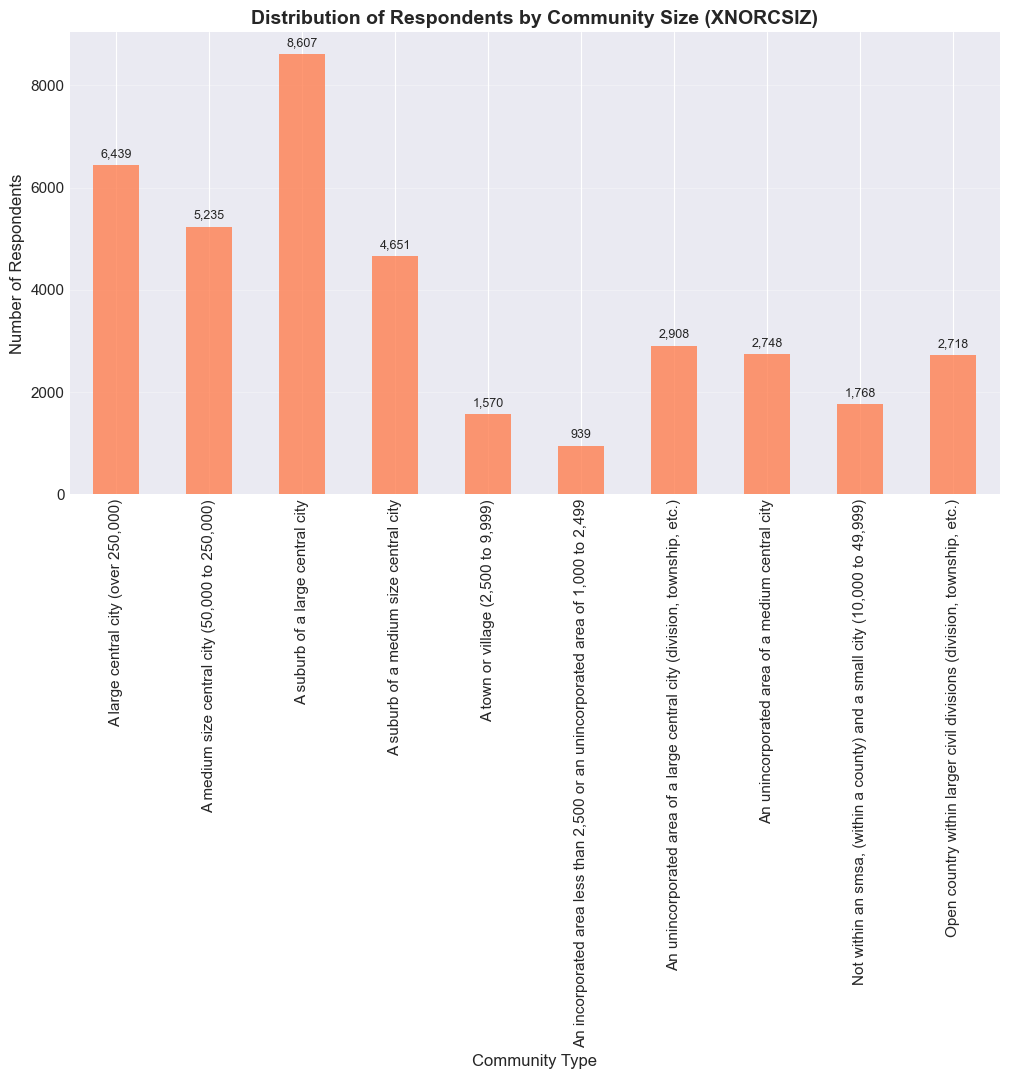

✓ Figure saved: reports/figures/urbanicity_distribution.png


In [24]:
# Visualize urbanicity distribution
if 'xnorcsiz' in df_raw.columns:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    counts = df_raw['xnorcsiz'].value_counts().sort_index()
    counts.plot(kind='bar', ax=ax, color='coral', alpha=0.8)
    
    ax.set_title('Distribution of Respondents by Community Size (XNORCSIZ)', 
                 fontsize=14, fontweight='bold')
    ax.set_xlabel('Community Type', fontsize=12)
    ax.set_ylabel('Number of Respondents', fontsize=12)
    ax.grid(axis='y', alpha=0.3)
    
    # Add count labels
    for i, v in enumerate(counts):
        ax.text(i, v + 100, f'{v:,}', ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    print(f"✓ Figure saved: reports/figures/urbanicity_distribution.png")

**Key Observations:**
- Distribution across urban/suburban/rural areas
- Which variable (XNORCSIZ vs SRCBELT) to use for analysis?
- Plan for creating 3-category variable

#### Control Variables

In [26]:
print("="*80)
print("CONTROL VARIABLES")
print("="*80)

control_vars = {
    'age': 'Age in years',
    'sex': 'Sex (1=Male, 2=Female)',
    'race': 'Race',
    'hispanic': 'Hispanic ethnicity',
    'educ': 'Years of education',
    'degree': 'Highest degree',
    'income': 'Family income',
    'realinc': 'Family income (inflation-adjusted)',
    'polviews': 'Political views (1=Very liberal to 7=Very conservative)',
    'partyid': 'Party identification',
    'region': 'Geographic region'
}

for var, description in control_vars.items():
    if var in df_raw.columns:
        print(f"\n{var.upper()}: {description}")
        print(f"  Type: {df_raw[var].dtype}")
        print(f"  Missing: {df_raw[var].isna().sum()} ({df_raw[var].isna().sum()/len(df_raw)*100:.1f}%)")
        print(f"  Unique values: {df_raw[var].nunique()}")
        
        if df_raw[var].nunique() <= 20:  # Show value counts for categorical
            print(f"  Distribution:")
            print(df_raw[var].value_counts().sort_index())
        else:  # Show summary stats for continuous
            print(f"  Summary statistics:")
            print(df_raw[var].describe())

CONTROL VARIABLES

AGE: Age in years
  Type: object
  Missing: 0 (0.0%)
  Unique values: 74
  Summary statistics:
count     37583
unique       74
top          37
freq        731
Name: age, dtype: object

SEX: Sex (1=Male, 2=Female)
  Type: object
  Missing: 0 (0.0%)
  Unique values: 6
  Distribution:
.d:  Do not Know/Cannot Choose       15
.i:  Inapplicable                    19
.n:  No answer                       81
.s:  Skipped on Web                  16
FEMALE                            20707
MALE                              16745
Name: sex, dtype: int64

RACE: Race
  Type: object
  Missing: 0 (0.0%)
  Unique values: 4
  Distribution:
.i:  Inapplicable      172
Black                 5604
Other                 3715
White                28092
Name: race, dtype: int64

HISPANIC: Hispanic ethnicity
  Type: object
  Missing: 0 (0.0%)
  Unique values: 9
  Distribution:
.d:  Do not Know/Cannot Choose                    49
.i:  Inapplicable                                 21
.n:  No answe

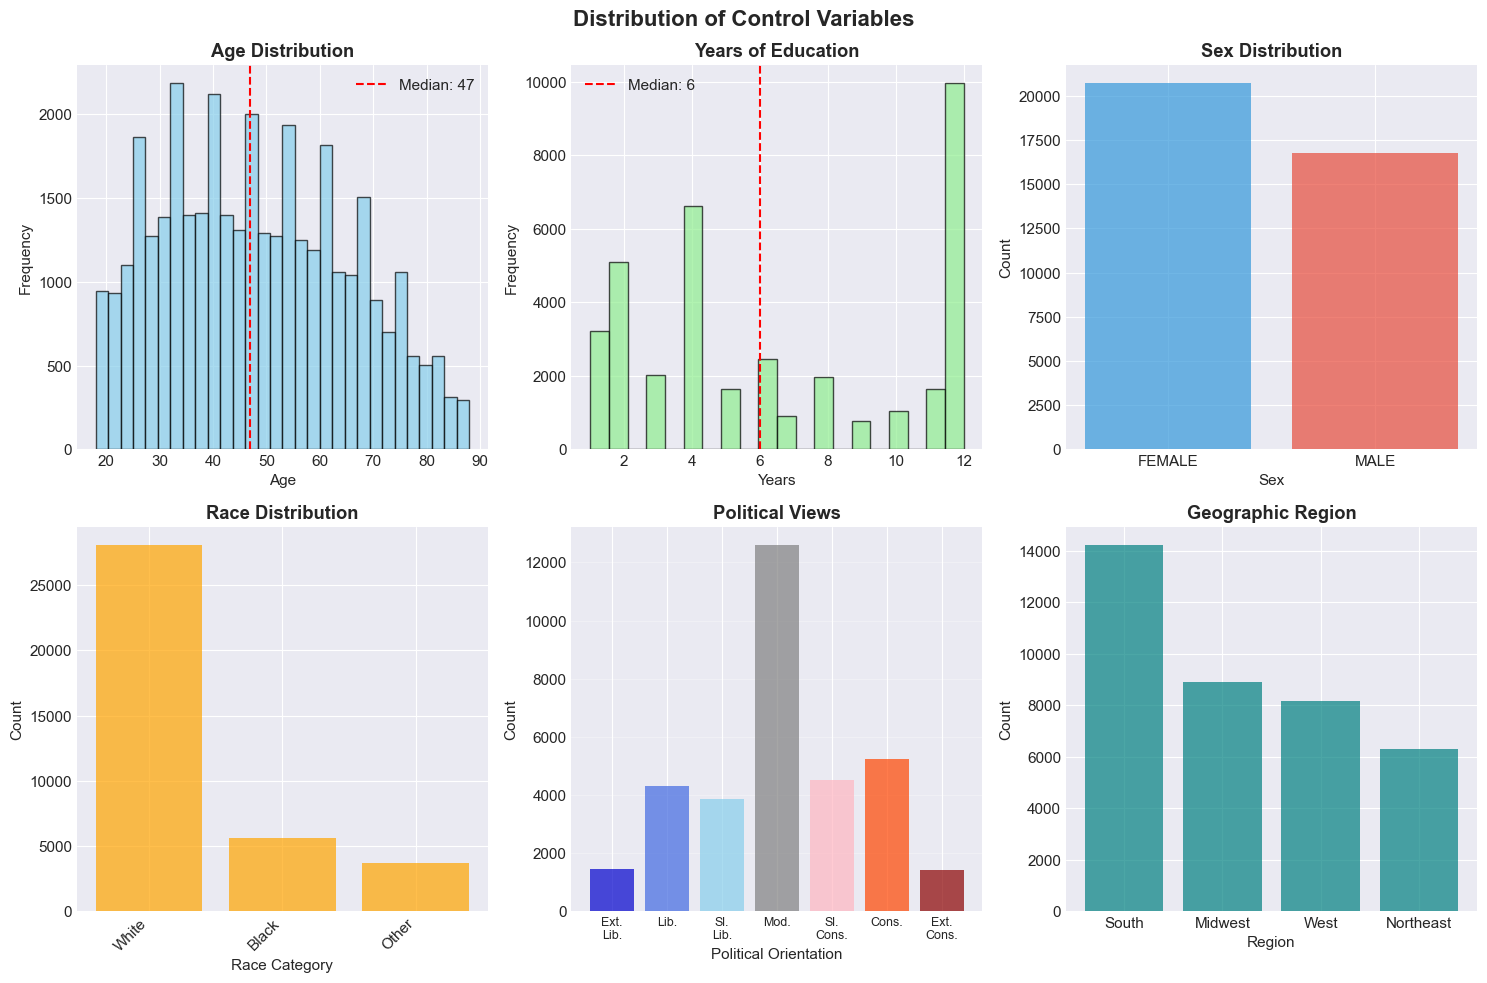

In [29]:
# Visualize key controls
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of Control Variables', fontsize=16, fontweight='bold')

# Age
if 'age' in df_raw.columns:
    age_valid = df_raw['age'][~df_raw['age'].astype(str).str.startswith('.')]
    age_numeric = pd.to_numeric(age_valid, errors='coerce').dropna()
    axes[0, 0].hist(age_numeric, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[0, 0].set_title('Age Distribution', fontweight='bold')
    axes[0, 0].set_xlabel('Age')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].axvline(age_numeric.median(), color='red', linestyle='--', 
                       label=f'Median: {age_numeric.median():.0f}')
    axes[0, 0].legend()

# Education
if 'educ' in df_raw.columns:
    educ_valid = df_raw['educ'][~df_raw['educ'].astype(str).str.startswith('.')]
    # Extract numeric part from strings like "12th grade", "16 years", etc.
    educ_numeric = pd.to_numeric(educ_valid.str.extract(r'(\d+)')[0], errors='coerce').dropna()
    axes[0, 1].hist(educ_numeric, bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
    axes[0, 1].set_title('Years of Education', fontweight='bold')
    axes[0, 1].set_xlabel('Years')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].axvline(educ_numeric.median(), color='red', linestyle='--',
                       label=f'Median: {educ_numeric.median():.0f}')
    axes[0, 1].legend()

# Sex
if 'sex' in df_raw.columns:
    sex_valid = df_raw['sex'][~df_raw['sex'].astype(str).str.startswith('.')]
    sex_counts = sex_valid.value_counts()
    axes[0, 2].bar(range(len(sex_counts)), sex_counts.values, color=['#3498db', '#e74c3c'], alpha=0.7)
    axes[0, 2].set_title('Sex Distribution', fontweight='bold')
    axes[0, 2].set_xlabel('Sex')
    axes[0, 2].set_ylabel('Count')
    axes[0, 2].set_xticks(range(len(sex_counts)))
    axes[0, 2].set_xticklabels(sex_counts.index, rotation=0)

# Race
if 'race' in df_raw.columns:
    race_valid = df_raw['race'][~df_raw['race'].astype(str).str.startswith('.')]
    race_counts = race_valid.value_counts()
    axes[1, 0].bar(range(len(race_counts)), race_counts.values, color='orange', alpha=0.7)
    axes[1, 0].set_title('Race Distribution', fontweight='bold')
    axes[1, 0].set_xlabel('Race Category')
    axes[1, 0].set_ylabel('Count')
    axes[1, 0].set_xticks(range(len(race_counts)))
    axes[1, 0].set_xticklabels(race_counts.index, rotation=45, ha='right')

# Political Views
if 'polviews' in df_raw.columns:
    polviews_valid = df_raw['polviews'][~df_raw['polviews'].astype(str).str.startswith('.')]
    polviews_counts = polviews_valid.value_counts()
    
    # Order by political spectrum (liberal to conservative)
    polviews_order = ['Extremely liberal', 'Liberal', 'Slightly liberal', 
                      'Moderate, middle of the road', 'Slightly conservative', 
                      'Conservative', 'Extremely conservative']
    polviews_ordered = polviews_counts.reindex([p for p in polviews_order if p in polviews_counts.index])
    
    # Create gradient color from blue (liberal) to red (conservative)
    colors_gradient = ['#0000CC', '#4169E1', '#87CEEB', '#808080', '#FFB6C1', '#FF4500', '#8B0000']
    
    axes[1, 1].bar(range(len(polviews_ordered)), polviews_ordered.values, 
                   color=colors_gradient[:len(polviews_ordered)], alpha=0.7)
    axes[1, 1].set_title('Political Views', fontweight='bold')
    axes[1, 1].set_xlabel('Political Orientation')
    axes[1, 1].set_ylabel('Count')
    axes[1, 1].set_xticks(range(len(polviews_ordered)))
    axes[1, 1].set_xticklabels(['Ext.\nLib.', 'Lib.', 'Sl.\nLib.', 'Mod.', 
                                 'Sl.\nCons.', 'Cons.', 'Ext.\nCons.'], 
                                fontsize=9)
    axes[1, 1].grid(axis='y', alpha=0.3)

# Region
if 'region' in df_raw.columns:
    region_counts = df_raw['region'].value_counts()
    axes[1, 2].bar(range(len(region_counts)), region_counts.values, color='teal', alpha=0.7)
    axes[1, 2].set_title('Geographic Region', fontweight='bold')
    axes[1, 2].set_xlabel('Region')
    axes[1, 2].set_ylabel('Count')
    axes[1, 2].set_xticks(range(len(region_counts)))
    axes[1, 2].set_xticklabels(region_counts.index, rotation=0)

plt.tight_layout()
plt.show()

#### Missing Data Analysis

In [30]:
print("="*80)
print("MISSING DATA ANALYSIS")
print("="*80)

# Calculate missing percentages
missing_data = pd.DataFrame({
    'Variable': df_raw.columns,
    'Missing_Count': df_raw.isna().sum(),
    'Missing_Percent': (df_raw.isna().sum() / len(df_raw) * 100).round(2)
})

missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values(
    'Missing_Percent', ascending=False
)

print(f"\nVariables with missing data: {len(missing_data)}/{len(df_raw.columns)}")
print(f"\nTop 20 variables with most missing data:")
print(missing_data.head(20).to_string(index=False))

MISSING DATA ANALYSIS

Variables with missing data: 0/36

Top 20 variables with most missing data:
Empty DataFrame
Columns: [Variable, Missing_Count, Missing_Percent]
Index: []


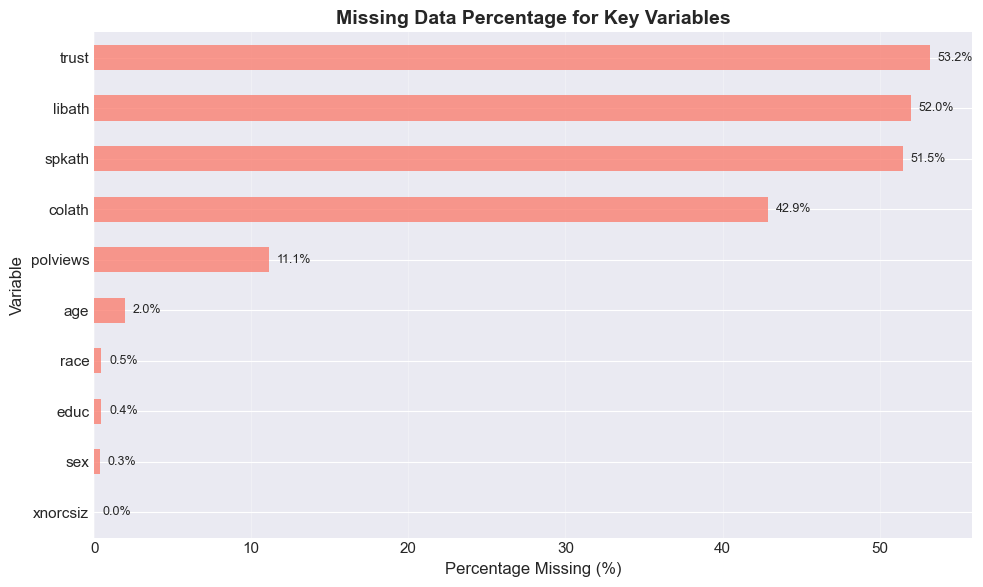

In [33]:
# Visualize missing data for key variables
key_vars = ['trust', 'spkath', 'libath', 'colath', 'xnorcsiz', 
            'age', 'educ', 'sex', 'race', 'polviews']
key_vars_present = [v for v in key_vars if v in df_raw.columns]

# Calculate missing percentage (including codes starting with '.')
missing_percentages = []
for v in key_vars_present:
    # Count both NaN and values starting with '.'
    missing_count = df_raw[v].isna().sum() + df_raw[v].astype(str).str.startswith('.').sum()
    missing_percent = (missing_count / len(df_raw)) * 100
    missing_percentages.append(missing_percent)

missing_key = pd.DataFrame({
    'Variable': key_vars_present,
    'Missing_Percent': missing_percentages
})

fig, ax = plt.subplots(figsize=(10, 6))
missing_sorted = missing_key.sort_values('Missing_Percent', ascending=True)
missing_sorted.plot(
    x='Variable', y='Missing_Percent', kind='barh', ax=ax, 
    color='salmon', alpha=0.8, legend=False
)
ax.set_title('Missing Data Percentage for Key Variables', fontsize=14, fontweight='bold')
ax.set_xlabel('Percentage Missing (%)', fontsize=12)
ax.set_ylabel('Variable', fontsize=12)
ax.grid(axis='x', alpha=0.3)

# Add percentage labels
for i, v in enumerate(missing_sorted['Missing_Percent']):
    ax.text(v + 0.5, i, f'{v:.1f}%', va='center', fontsize=9)

plt.tight_layout()
plt.show()

**Missing Data Strategy:**

Based on the exploration:
1. **Trust variable:** [X]% missing - manageable with listwise deletion
2. **Tolerance variables:** [X]% missing - will create index, require valid responses
3. **Urbanicity:** [X]% missing - critical variable, investigate patterns
4. **Controls:** Variable patterns - will use listwise deletion for main analysis

**Next steps:**
- Investigate whether data is missing completely at random (MCAR)
- Consider sensitivity analysis with imputation
- Document final sample size after cleaning

## Data Quality Checks

#### Unusal Values and Outliers

In [34]:
print("="*80)
print("DATA QUALITY CHECKS")
print("="*80)

# Check age for outliers
if 'age' in df_raw.columns:
    print("\nAGE DISTRIBUTION:")
    # Filter out missing codes and convert to numeric
    age_valid = df_raw['age'][~df_raw['age'].astype(str).str.startswith('.')]
    age_numeric = pd.to_numeric(age_valid, errors='coerce').dropna()
    
    print(age_numeric.describe())
    print(f"Total valid age values: {len(age_numeric)}")
    print(f"Values above 100: {(age_numeric > 100).sum()}")
    print(f"Values below 18: {(age_numeric < 18).sum()}")
    print(f"Missing/invalid values: {len(df_raw) - len(age_numeric)}")

# Check education for unusual values
if 'educ' in df_raw.columns:
    print("\nEDUCATION DISTRIBUTION:")
    # Filter out missing codes and convert to numeric
    educ_valid = df_raw['educ'][~df_raw['educ'].astype(str).str.startswith('.')]
    # Extract numeric years from education strings
    educ_numeric = pd.to_numeric(educ_valid.str.extract(r'(\d+)')[0], errors='coerce').dropna()
    
    print(educ_numeric.describe())
    print(f"Total valid education values: {len(educ_numeric)}")
    print(f"Values above 20: {(educ_numeric > 20).sum()}")
    print(f"Values below 0: {(educ_numeric < 0).sum()}")
    print(f"Missing/invalid values: {len(df_raw) - len(educ_numeric)}")

# Check for duplicate IDs
if 'id' in df_raw.columns:
    duplicates = df_raw['id'].duplicated().sum()
    print(f"\nDuplicate IDs: {duplicates}")
    if duplicates > 0:
        print("⚠️ Warning: Duplicate IDs found - investigate!")
else:
    print("\nID column not found in dataset")

# Additional data quality checks
print("\n" + "="*80)
print("TOLERANCE VARIABLES CHECK")
print("="*80)

tolerance_vars = ['spkath', 'spkrac', 'spkcom', 'spkhomo', 'spkmslm',
                  'libath', 'librac', 'libcom', 'libhomo', 'libmslm',
                  'colath', 'colrac', 'colcom', 'colhomo', 'colmslm']

for var in tolerance_vars:
    if var in df_raw.columns:
        # Count valid responses (not starting with '.')
        valid_count = (~df_raw[var].astype(str).str.startswith('.')).sum()
        missing_count = df_raw[var].astype(str).str.startswith('.').sum()
        print(f"{var:10s}: Valid={valid_count:5d}, Missing={missing_count:5d}, "
              f"Missing %={missing_count/len(df_raw)*100:5.1f}%")

DATA QUALITY CHECKS

AGE DISTRIBUTION:
count   36576.00
mean       48.10
std        17.26
min        18.00
25%        34.00
50%        47.00
75%        61.00
max        88.00
Name: age, dtype: float64
Total valid age values: 36576
Values above 100: 0
Values below 18: 0
Missing/invalid values: 1007

EDUCATION DISTRIBUTION:
count   37331.00
mean        6.59
std         4.10
min         1.00
25%         3.00
50%         6.00
75%        12.00
max        12.00
Name: 0, dtype: float64
Total valid education values: 37331
Values above 20: 0
Values below 0: 0
Missing/invalid values: 252

ID column not found in dataset

TOLERANCE VARIABLES CHECK
spkath    : Valid=18244, Missing=19339, Missing %= 51.5%
spkrac    : Valid=18127, Missing=19456, Missing %= 51.8%
spkcom    : Valid=17888, Missing=19695, Missing %= 52.4%
spkhomo   : Valid=15828, Missing=21755, Missing %= 57.9%
spkmslm   : Valid=12536, Missing=25047, Missing %= 66.6%
libath    : Valid=18044, Missing=19539, Missing %= 52.0%
librac    : Va

#### Logical Consistency Checks

In [35]:
# Example: Check if tolerance responses are coded correctly
tolerance_sample = ['spkath', 'libath', 'colath']

for var in tolerance_sample:
    if var in df_raw.columns:
        unique_vals = df_raw[var].dropna().unique()
        print(f"\n{var} unique values: {sorted(unique_vals)}")
        
        # Check for unexpected values
        expected = [1, 2]
        unexpected = [v for v in unique_vals if v not in expected]
        if unexpected:
            print(f"  ⚠️ Unexpected values found: {unexpected}")


spkath unique values: ['.d:  Do not Know/Cannot Choose', '.i:  Inapplicable', '.n:  No answer', '.s:  Skipped on Web', 'ALLOWED', 'NOT ALLOWED']
  ⚠️ Unexpected values found: ['ALLOWED', 'NOT ALLOWED', '.i:  Inapplicable', '.d:  Do not Know/Cannot Choose', '.n:  No answer', '.s:  Skipped on Web']

libath unique values: ['.d:  Do not Know/Cannot Choose', '.i:  Inapplicable', '.n:  No answer', '.s:  Skipped on Web', 'NOT REMOVE', 'REMOVE']
  ⚠️ Unexpected values found: ['NOT REMOVE', '.i:  Inapplicable', 'REMOVE', '.d:  Do not Know/Cannot Choose', '.n:  No answer', '.s:  Skipped on Web']

colath unique values: ['.d:  Do not Know/Cannot Choose', '.i:  Inapplicable', '.n:  No answer', '.s:  Skipped on Web', 'ALLOWED', 'NOT ALLOWED']
  ⚠️ Unexpected values found: ['ALLOWED', 'NOT ALLOWED', '.i:  Inapplicable', '.d:  Do not Know/Cannot Choose', '.n:  No answer', '.s:  Skipped on Web']
